In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target
x.shape, y.shape

((150, 4), (150,))

In [3]:
df = pd.DataFrame(
    x, columns=["sepal length", "sepal width", "petal length", "petal width"]
)
target_names = {i: name for i, name in enumerate(iris.target_names)}
df["class"] = [target_names[i] for i in y]
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


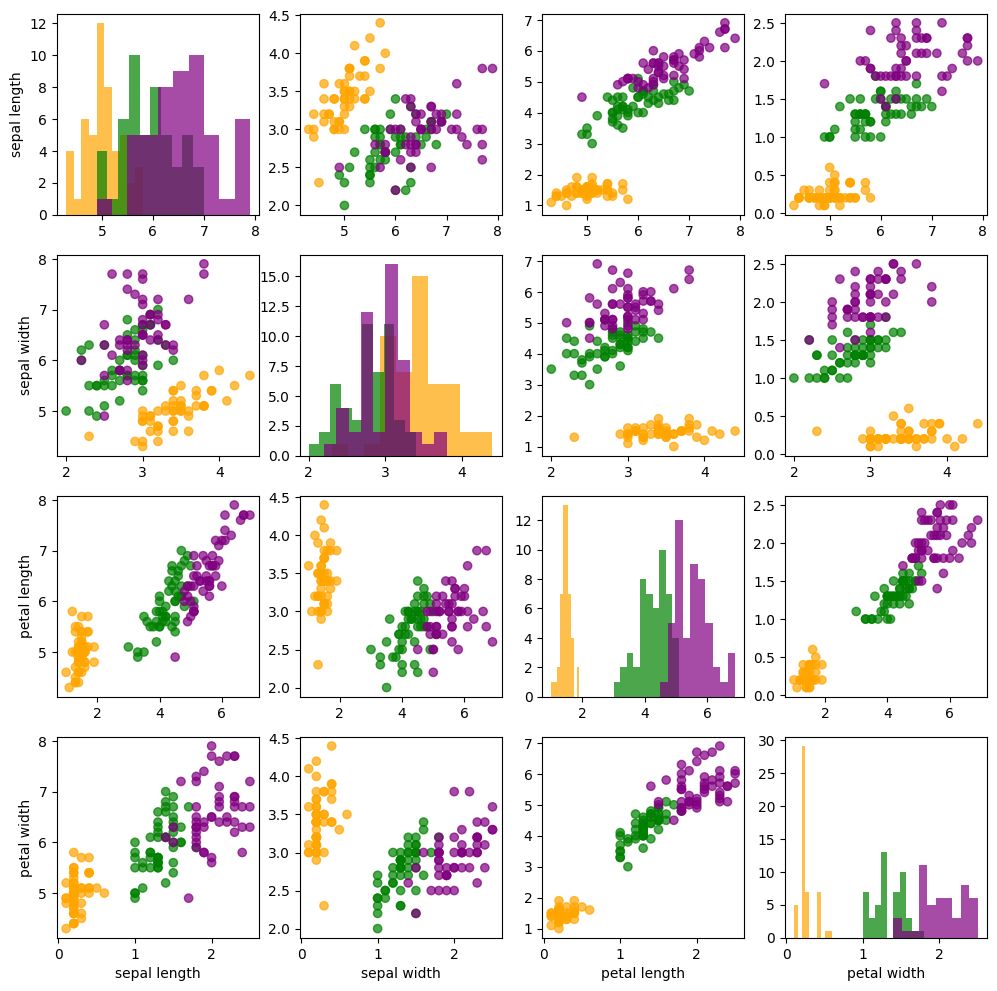

In [4]:
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
colors_dict = {
    name: color for name, color in zip(iris.target_names, ["orange", "green", "purple"])
}
for i, ci in enumerate(df.columns[:-1]):
    for j, cj in enumerate(df.columns[:-1]):
        if ci == cj:
            for name, color in colors_dict.items():
                axs[i, j].hist(df[df["class"] == name][ci], color=color, alpha=0.7)
        else:
            axs[i, j].scatter(
                df[ci], df[cj], c=df["class"].replace(colors_dict), alpha=0.7
            )
        if cj == df.columns[0]:
            axs[i, j].set_ylabel(ci)
        if ci == df.columns[-2]:
            axs[i, j].set_xlabel(cj)
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [6]:
mod_dt = DecisionTreeClassifier(max_depth=3, random_state=42)

In [7]:
mod_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [8]:
prediction = mod_dt.predict(X_test)

In [9]:
prediction

array([2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 1, 0, 0, 1, 1,
       1])

In [10]:
metrics.accuracy_score(prediction, y_test)

0.8888888888888888

In [11]:
mod_dt.feature_importances_

array([0.        , 0.        , 0.96229379, 0.03770621])

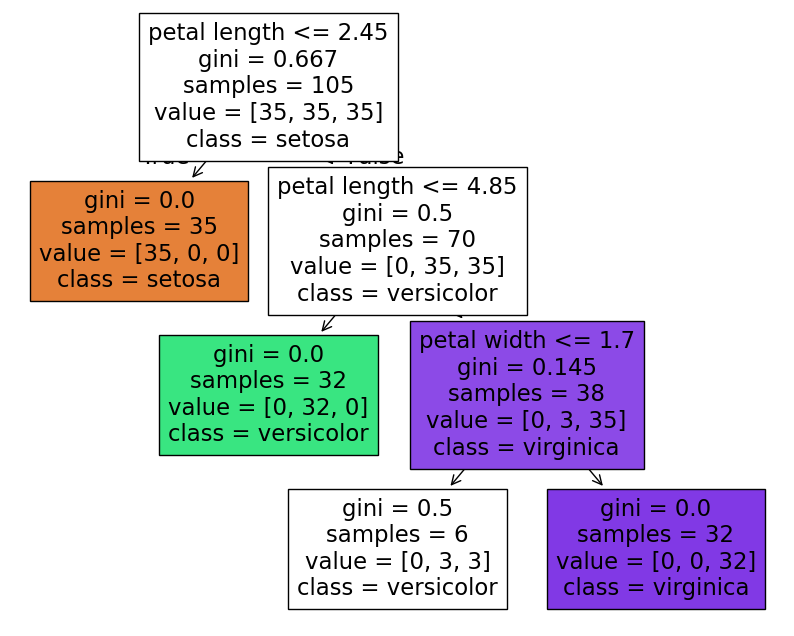

In [12]:
plt.figure(figsize=(10, 8))
plot_tree(
    mod_dt, feature_names=df.columns[:-1], class_names=iris.target_names, filled=True
)
plt.show()

In [13]:
mod_dt_entropy = DecisionTreeClassifier(
    max_depth=3, random_state=42, criterion="entropy"
)

In [14]:
mod_dt_entropy.fit(X_train, y_train)
prediction = mod_dt_entropy.predict(X_test)
print(prediction)
print(metrics.accuracy_score(prediction, y_test))
print(mod_dt_entropy.feature_importances_)

[2 0 1 0 0 0 0 1 1 1 2 1 1 0 0 1 0 2 2 0 0 2 2 2 2 1 0 2 1 1 1 1 2 0 2 0 2
 1 1 1 0 0 1 1 1]
0.8888888888888888
[0.         0.         0.94301588 0.05698412]


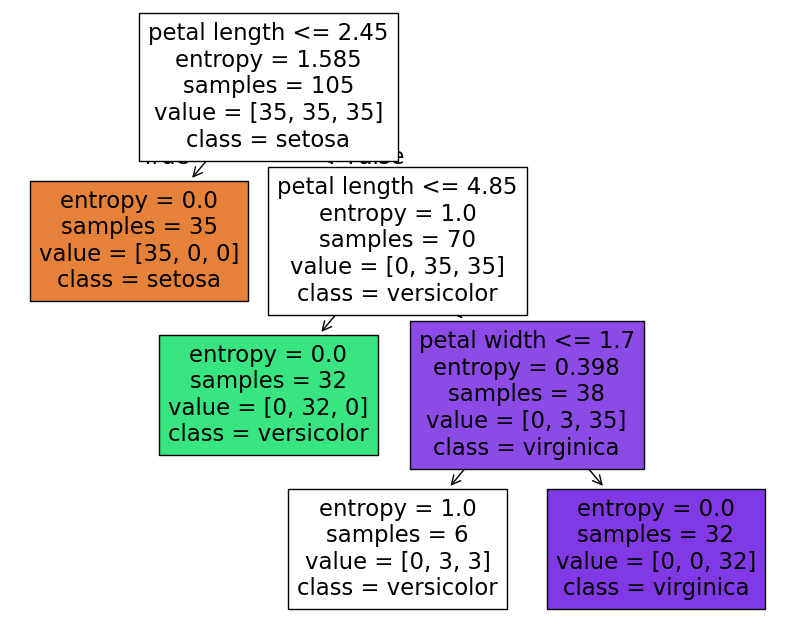

In [15]:
plt.figure(figsize=(10, 8))
plot_tree(
    mod_dt_entropy,
    feature_names=df.columns[:-1],
    class_names=iris.target_names,
    filled=True,
)
plt.show()

# Regression

In [16]:
diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target
x.shape, y.shape

((442, 10), (442,))

In [17]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((309, 10), (133, 10), (309,), (133,))

In [19]:
mod_dt = DecisionTreeRegressor(max_depth=3, criterion="absolute_error")

In [20]:
mod_dt.fit(X_train, y_train)
prediction = mod_dt.predict(X_test)

In [21]:
mod_dt.score(X_test, y_test)

0.3389798792626699

In [22]:
mod_dt.feature_importances_

array([0.        , 0.        , 0.29960682, 0.07916121, 0.        ,
       0.02673657, 0.04010485, 0.        , 0.55439056, 0.        ])

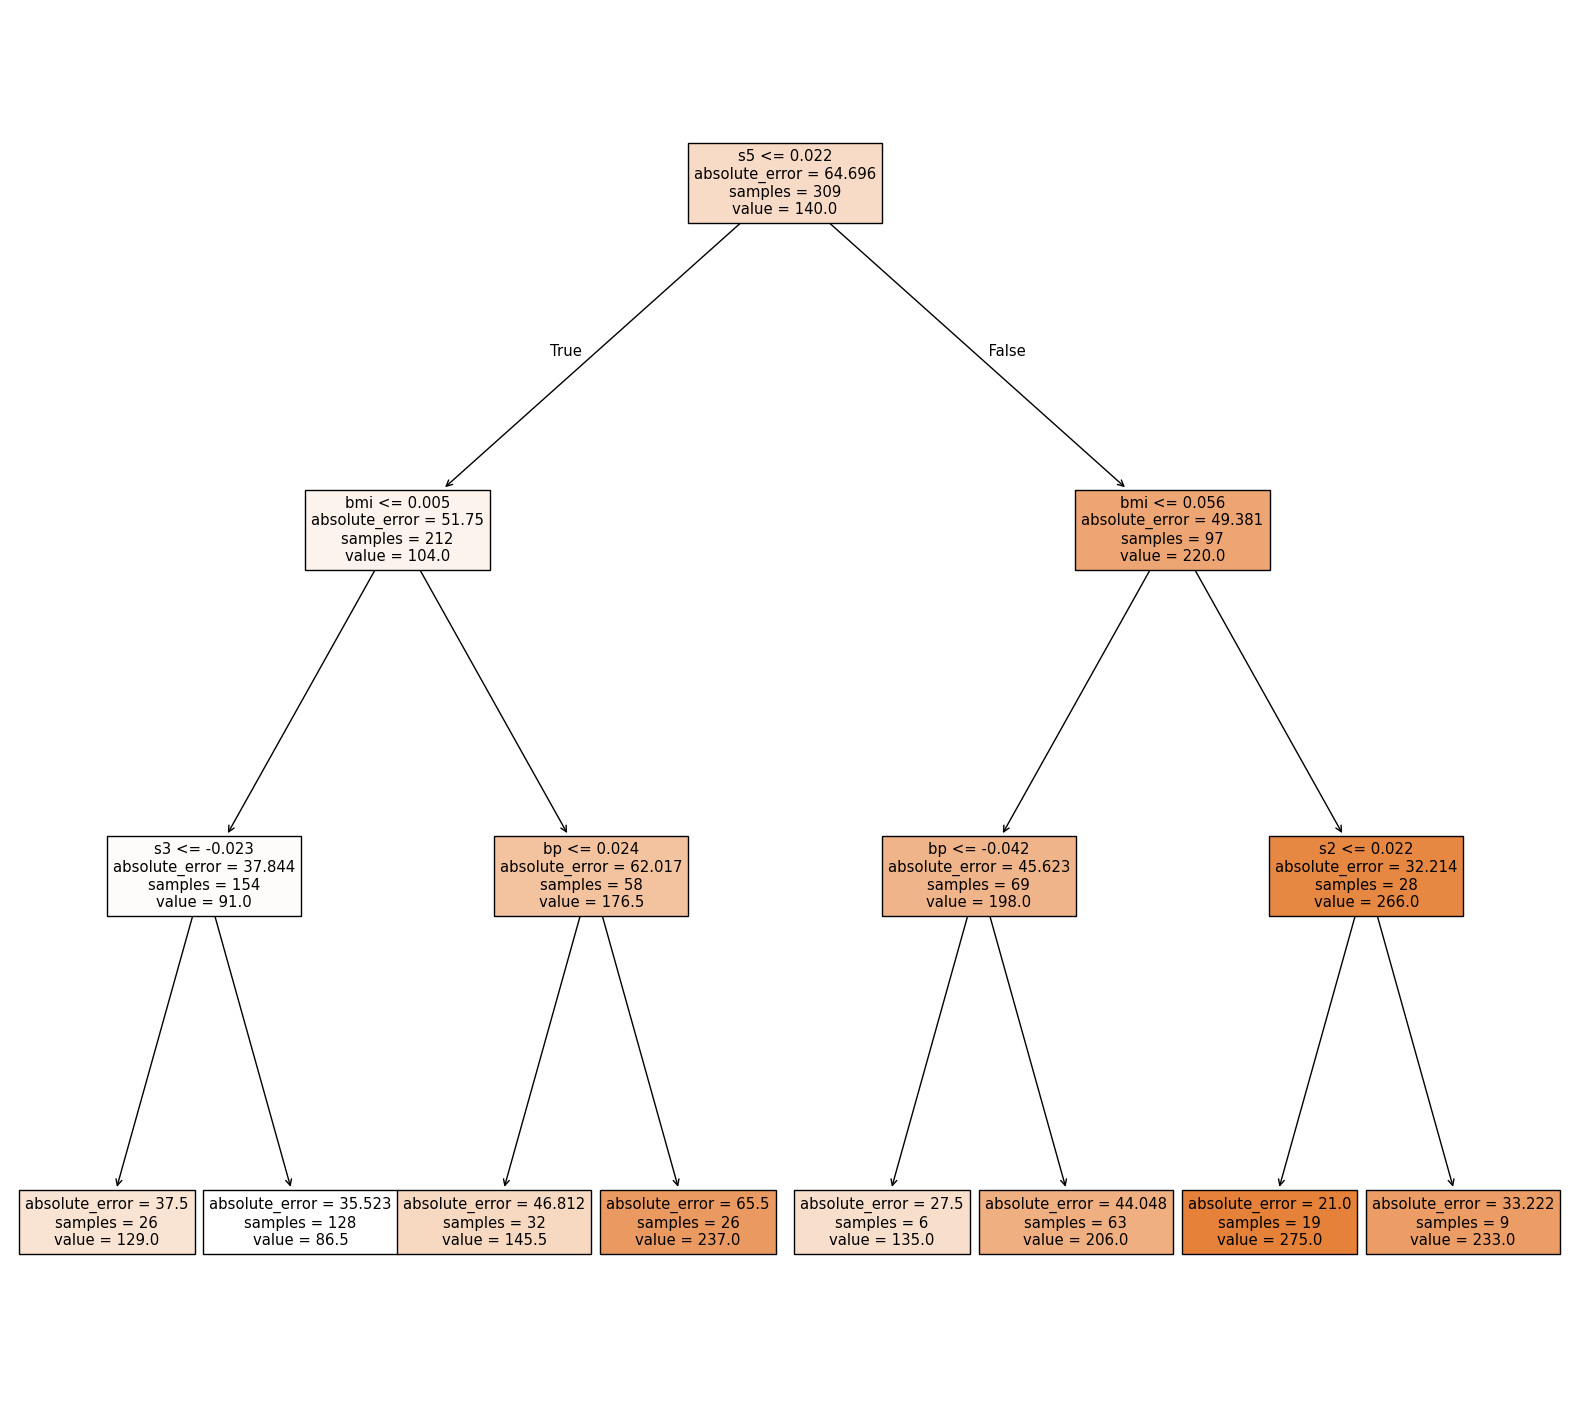

In [23]:
plt.figure(figsize=(20, 18))
plot_tree(mod_dt, feature_names=diabetes.feature_names, filled=True)
plt.show()

In [50]:
scores = []
for coef in range(1, 100):
    alpha = coef / 100
    mod_dt = DecisionTreeRegressor(
        max_depth=20, criterion="absolute_error", random_state=42, ccp_alpha=alpha
    )
    mod_dt.fit(X_train, y_train)
    prediction = mod_dt.predict(X_test)
    scores.append(mod_dt.score(X_test, y_test))

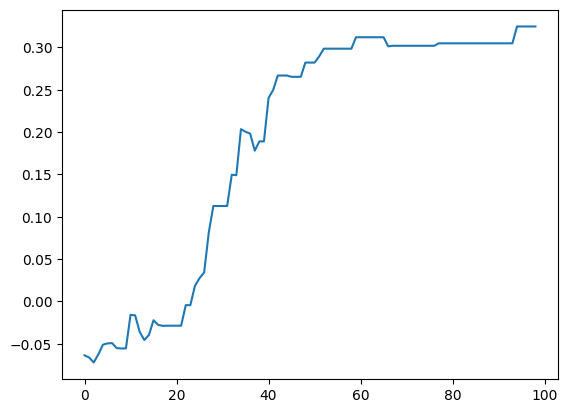

In [51]:
plt.plot(scores)